In [9]:
from lsh import *
from utils import *
from query import *
import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:

k = 10
L = 4
d = 1024   #data dimensionality
N_queries = 10

Ns = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
Ns = [100, 500, 1000, 2000]
for n in range(10000, 100000, 10000):
    Ns.append(n)
    
Ns = []
for x in linspace(2, 6, 5):
    Ns.append(10**x)
print(Ns)

d1s = []
d2s = []
print("N, LSH, Linear ")
for n_idx, n in enumerate(Ns):
    G = data_generator(n=n,d=d,normalize=True)
    b = 200 #hash bits
    M = 30  #number of permutations
    model = LSH(X=G.get_dataset(),b=b,M=M)

    t1 = time.time()
    for i in range(N_queries):
        model.approx_top_k(G.get_query(), k, L, refine="innerprod")
    t2 = time.time()
    duration1 = (t2-t1)/N_queries*1000
    
    t1 = time.time()
    for i in range(N_queries):
        model.exact_top_k(G.get_query(), k)
    t2 = time.time()
    duration2 = (t2-t1)/N_queries*1000
    
    print("{},{:6.3f}, {:6.3f}".format(n, duration1, duration2))
    d1s.append(duration1)
    d2s.append(duration2)
    



N, LSH, Linear 
100, 1.247,  0.075
500, 1.547,  0.119
1000, 3.143,  0.332
2000, 3.786,  0.730
10000, 4.715,  4.938
20000, 4.385, 10.616
30000, 5.026, 11.694
40000, 5.330, 22.678
50000, 6.860, 28.595
60000, 6.159, 35.263
70000, 5.863, 41.582
80000, 7.112, 48.286
90000, 6.684, 53.071


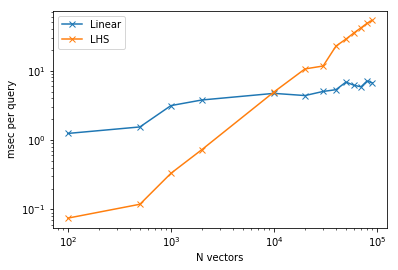

In [44]:
plt.loglog(Ns, d1s, '-x', label="Linear")
plt.loglog(Ns, d2s, '-x', label="LHS")
plt.xlabel("N vectors")
plt.ylabel("msec per query")
plt.legend()

In [ ]:
plt.plot(Ns, d1s, '-x', label="Linear")
plt.plot(Ns, d2s, '-x', label="LHS")
plt.xlabel("N vectors")
plt.ylabel("msec per query")
plt.legend()

In [38]:
Ns = [100, 500, 1000, 2000, range(10000, 100000, 10000)]


In [39]:
print(Ns)

[100, 500, 1000, 2000, range(10000, 100000, 10000)]
